In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
data= pd.read_csv("vehicles.csv")

In [2]:
data.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [4]:
data.shape

(423857, 25)

In [5]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [6]:
data.nunique(axis=0)
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,county,lat,long
count,423857.000000,423857.000000,328743.000000,270585.000000,0.000000,324404.000000,324404.000000
mean,7190602108.850494,57794.374777,2009.827358,99425.784611,nan,38.731429,-93.949367
std,5159268.778739,10025805.116449,10.135809,120483.312390,nan,5.902977,17.930566
min,7178301636.000000,0.000000,1900.000000,0.000000,nan,-80.386400,-161.394000
25%,7186687550.000000,4499.000000,2007.000000,44324.000000,nan,35.054500,-106.678000
50%,7192067820.000000,9995.000000,2012.000000,91749.000000,nan,39.366900,-88.009900
75%,7194909078.000000,18995.000000,2016.000000,137237.000000,nan,42.517075,-80.832500
max,7197006076.000000,3808256046.000000,2021.000000,10000000.000000,nan,80.383400,115.524000


In [7]:
data.describe()

,id,price,year,odometer,county,lat,long
count,4.238570e+05,4.238570e+05,328743.000000,2.705850e+05,0.0,324404.000000,324404.000000
mean,7.190602e+09,5.779437e+04,2009.827358,9.942578e+04,NaN,38.731429,-93.949367
std,5.159269e+06,1.002581e+07,10.135809,1.204833e+05,NaN,5.902977,17.930566
min,7.178302e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-80.386400,-161.394000
25%,7.186688e+09,4.499000e+03,2007.000000,4.432400e+04,NaN,35.054500,-106.678000
50%,7.192068e+09,9.995000e+03,2012.000000,9.174900e+04,NaN,39.366900,-88.009900
75%,7.194909e+09,1.899500e+04,2016.000000,1.372370e+05,NaN,42.517075,-80.832500
max,7.197006e+09,3.808256e+09,2021.000000,1.000000e+07,NaN,80.383400,115.524000


In [31]:
data.condition.unique()

array(['excellent', 'good', 'fair', nan, 'like new', 'salvage', 'new'],
      dtype=object)

In [32]:
#Reclassify condition column
def clean_condition(row):
    
    good = ['good','fair']
    excellent = ['excellent','like new']       
    
    if row.condition in good:
        return 'good'   
    if row.condition in excellent:
        return 'excellent'    
    return row.condition  # Clean dataframe

def clean_data(playlist):
    data_cleaned = data.copy()
    data_cleaned['condition'] = data_cleaned.apply(lambda row: clean_condition(row), axis=1)
    return data_cleaned   # Get df with reclassfied 'condition' column

data_cleaned = clean_data(data) 
print(data_cleaned.condition.unique())

['excellent' 'good' nan 'salvage' 'new']


In [33]:
data_cleaned = data_cleaned.copy().drop(['url','image_url',"county"], axis=1)

In [34]:
NA_val = data_cleaned.isna().sum()

def na_filter(na, threshold = .4): 
    #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/data_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_passdata_cleaned == data_cleaned[na_filter(NA_val)]

data_cleaned.columns


Index(['id', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'description', 'state', 'lat', 'long'],
      dtype='object')

In [35]:
data_cleaned.shape

(423857, 22)

In [36]:
data_cleaned = data_cleaned[data_cleaned['price'].between(999.99, 99999.00)]
data_cleaned = data_cleaned[data_cleaned['year'] > 1990]
data_cleaned = data_cleaned[data_cleaned['odometer'] < 899999.00]
data_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,id,price,year,odometer,lat,long
count,235950.000000,235950.000000,235950.000000,235950.000000,234233.000000,234233.000000
mean,7189026980.751342,16286.991507,2011.592299,99819.519627,38.984416,-93.777778
std,4752768.671934,12719.926879,5.622341,66096.821992,5.914886,18.001142
min,7178301636.000000,1000.000000,1991.000000,0.000000,-80.386400,-161.394000
25%,7185450201.000000,6995.000000,2008.000000,47291.000000,35.185100,-106.642000
50%,7189992815.000000,12995.000000,2013.000000,94794.000000,39.632100,-87.397400
75%,7193312992.500000,21500.000000,2016.000000,140000.000000,42.700800,-80.829900
max,7195225072.000000,99999.000000,2021.000000,895137.000000,65.743600,94.163200


In [37]:
data_cleaned.shape

(235950, 22)

In [38]:
data_cleaned=data_cleaned.dropna(axis=1)

In [39]:
data_cleaned.shape

(235950, 7)

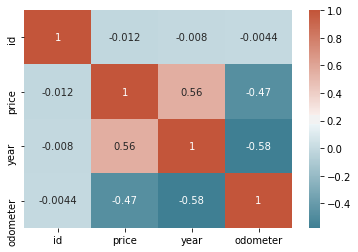

In [41]:
corr = data_cleaned.corr()# plot the heatmap

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

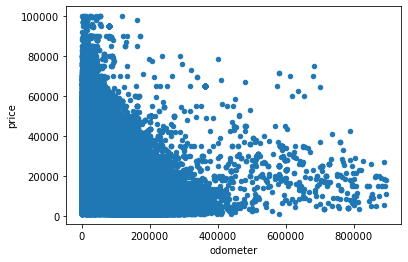

In [45]:
data_cleaned.plot(kind='scatter', x='odometer', y='price')


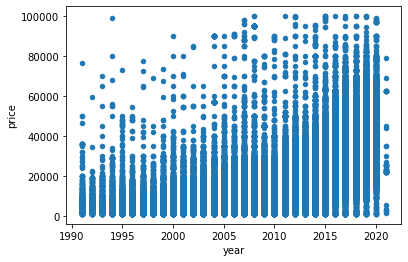

In [47]:
data_cleaned.plot(kind='scatter', x='year', y='price')


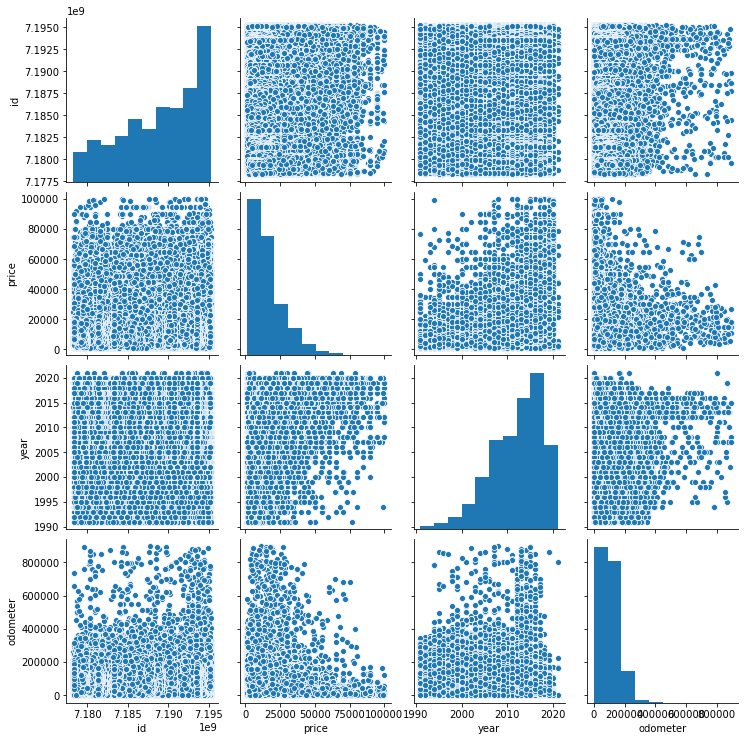

In [49]:
sns.pairplot(data_cleaned)


In [51]:
cor=data_cleaned.corr()
cor

,id,price,year,odometer
id,1.000000,-0.012365,-0.007970,-0.004394
price,-0.012365,1.000000,0.558706,-0.474409
year,-0.007970,0.558706,1.000000,-0.577980
odometer,-0.004394,-0.474409,-0.577980,1.000000


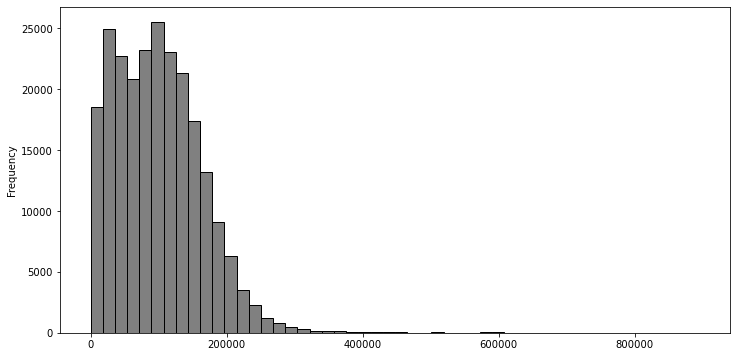

In [55]:
data_cleaned['odometer'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')


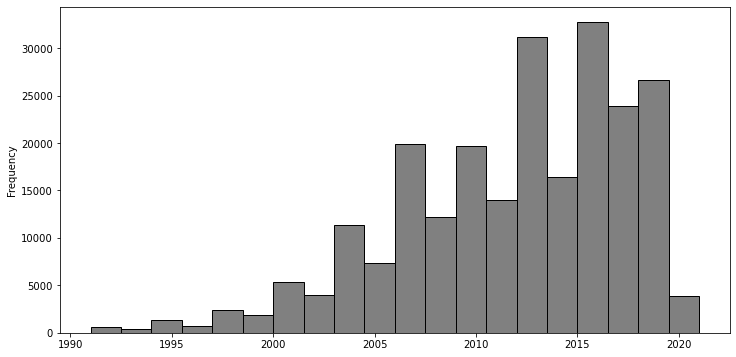

In [54]:
data_cleaned['year'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')


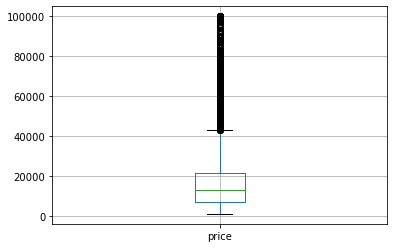

In [57]:
data_cleaned.boxplot('price')
